In [4]:
# Dataset - 3 : Random Forest Water Quality Dataset

# Step 1: Import Libraries

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer  # ADD THIS LINE

# Explanation: This cell imports all the libraries needed for data manipulation,
# visualization, model building, evaluation, and preprocessing.

In [15]:
# Step 2: Load the Dataset

# Load the Water Quality Dataset
# Load the Dataset
try:
    water_data = pd.read_csv('waterQuality1.csv')
except FileNotFoundError:
    print("Error: waterQuality1.csv not found.")
    exit()

# Filter out rows with incorrect labels in 'is_safe'
water_data = water_data[water_data['is_safe'].isin(['0', '1'])]

# Convert 'is_safe' to numeric (important after filtering)
water_data['is_safe'] = pd.to_numeric(water_data['is_safe'])

# Display basic info
print("First 5 rows:")
print(water_data.head())
print("\nDataset info:")
print(water_data.info())
print("\nMissing values:")
print(water_data.isnull().sum())
print("\nUnique values in is_safe after filtering:", water_data['is_safe'].unique())

# Explanation: This cell loads the 'waterQuality1.csv' file into a pandas DataFrame.
# It also displays the first few rows, dataset information, and the count of missing values.
# Make sure to upload the 'waterQuality1.csv' file to your Colab environment.

First 5 rows:
   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  u

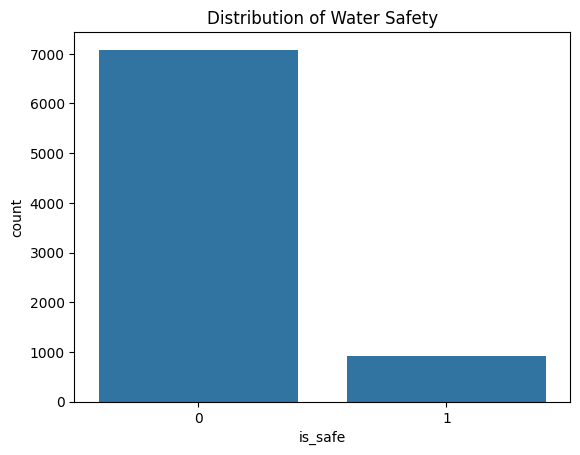


Processed X_train shape: (5597, 19)
Processed X_test shape: (2399, 19)


In [16]:
# Step 3: Data Exploration and Preprocessing
# Explore target variable
sns.countplot(x='is_safe', data=water_data)
plt.title('Distribution of Water Safety')
plt.show()

# Separate features and target
X = water_data.drop('is_safe', axis=1)
y = water_data['is_safe']

# Identify numerical columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Create preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Apply preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply preprocessing to training and testing sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert processed data to DataFrames (optional)
X_train_processed = pd.DataFrame(X_train_processed, columns=numerical_cols)
X_test_processed = pd.DataFrame(X_test_processed, columns=numerical_cols)

print("\nProcessed X_train shape:", X_train_processed.shape)
print("Processed X_test shape:", X_test_processed.shape)

# Explanation: This cell explores the distribution of the 'is_safe' target variable.
# It then separates features (X) and the target (y). Numerical columns are identified,
# and a preprocessing pipeline (imputation for missing values, scaling) is created.
# The data is split into training and testing sets, and the preprocessing is applied.

In [17]:
# Step 4: Initialize and Train the Random Forest Model
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train_processed, y_train)

print("\nRandom Forest model trained.")

# Explanation: This cell initializes a Random Forest Classifier model with 100 trees,
# a fixed random state for reproducibility, and balanced class weights to handle
# potential class imbalance. The model is then trained on the preprocessed training data.


Random Forest model trained.



Accuracy: 0.9479

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2125
           1       0.87      0.64      0.74       274

    accuracy                           0.95      2399
   macro avg       0.91      0.81      0.85      2399
weighted avg       0.95      0.95      0.94      2399



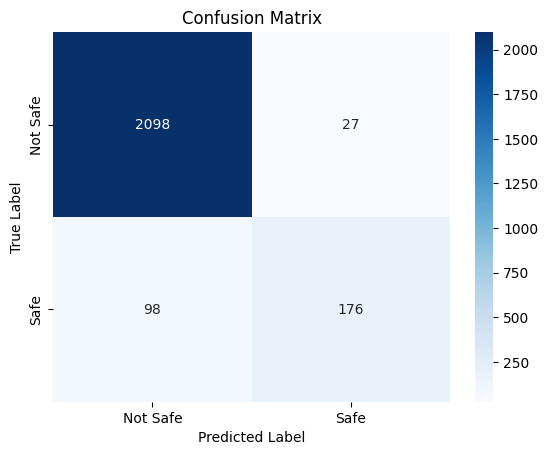

In [18]:
# Step 5: Make Predictions and Evaluate the Model
# Make predictions on the test set
y_pred = rf_model.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Safe', 'Safe'], yticklabels=['Not Safe', 'Safe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Explanation: This cell uses the trained Random Forest model to make predictions
# on the preprocessed test data. It then evaluates the model's performance using
# accuracy, a classification report (precision, recall, F1-score), and a confusion matrix.

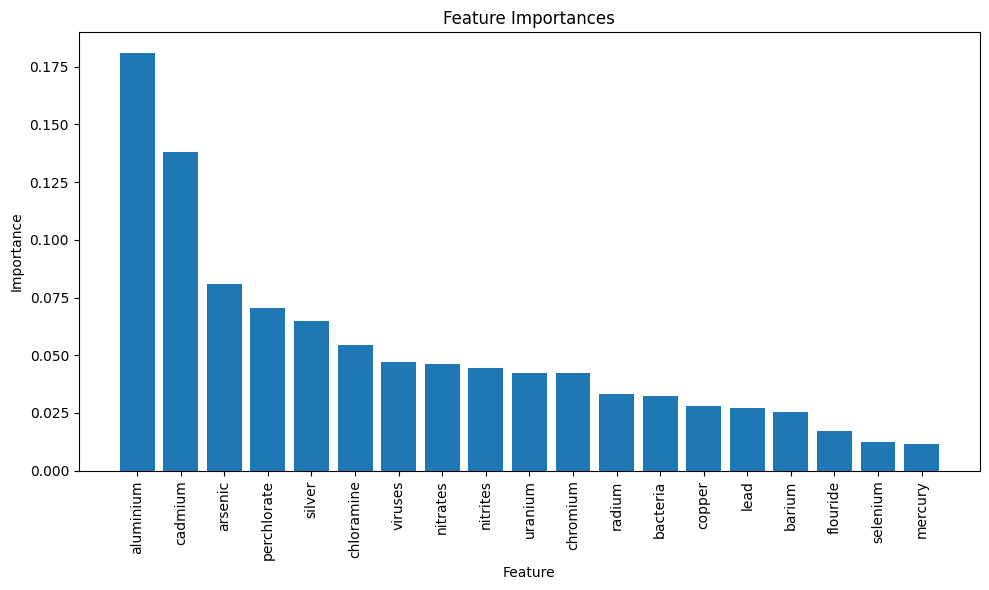

In [19]:
# Step 6: Analyze Feature Importance
# Analyze feature importance
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_processed.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train_processed.shape[1]), X_train_processed.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Explanation: This cell extracts the importance scores of each feature from the
# trained Random Forest model and visualizes them as a bar plot, showing which
# features were most influential in the model's predictions.

In [20]:
# Step 7: Hyperparameter Tuning using GridSearchCV
# Create a pipeline for preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Explanation: This cell uses GridSearchCV to find the best combination of hyperparameters
# for the Random Forest model. It defines a range of hyperparameters to test, performs
# 3-fold cross-validation, and evaluates performance using the F1-score. The best
# hyperparameters and the corresponding score are printed, and the best model is stored.


Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 200}
Best F1-score: 0.7685279052173956



Optimized Accuracy: 0.9521

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2125
           1       0.78      0.82      0.80       274

    accuracy                           0.95      2399
   macro avg       0.88      0.89      0.88      2399
weighted avg       0.95      0.95      0.95      2399



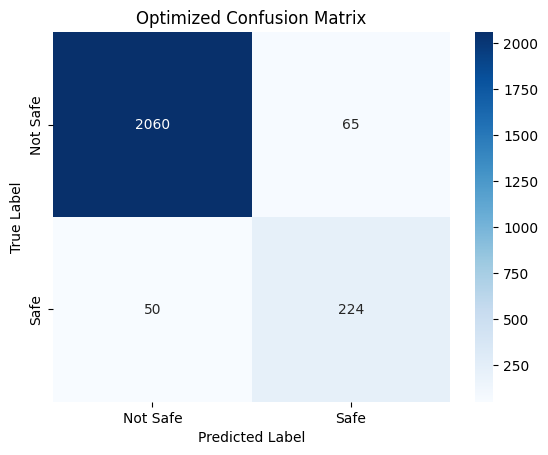


Cross-validation F1-scores (Optimized): [0.21638924 0.56852792 0.63757116 0.66889632 0.07407407]
Mean CV F1-score (Optimized): 0.4331


In [21]:
# Step 8: Evaluate the Optimized Model
# Make predictions with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the optimized model
print(f"\nOptimized Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Safe', 'Safe'], yticklabels=['Not Safe', 'Safe'])
plt.title('Optimized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Perform cross-validation on the best model
cv_scores_best = cross_val_score(best_rf_model, X, y, cv=5, scoring='f1')
print(f"\nCross-validation F1-scores (Optimized): {cv_scores_best}")
print(f"Mean CV F1-score (Optimized): {cv_scores_best.mean():.4f}")

# Explanation: This cell evaluates the performance of the Random Forest model trained
# with the best hyperparameters found by GridSearchCV on the test data. It calculates
# and prints the accuracy, classification report, and confusion matrix. It also performs
# 5-fold cross-validation on the entire dataset with the best model for a more
# robust performance estimate.